# Quantum Generative Adversarial Network to Generate Neurons

## Data preprocessing for e-types

In [1]:
# Import necessary libraries

# Import the os module to interact with the operating system.
import os

# Import the torch module to utilize features of the PyTorch framework, mainly used for deep learning.
import torch

# Import the pandas library and alias it as pd for handling and analyzing data, particularly DataFrames.
import pandas as pd

# Import the numpy library and alias it as np for numerical computing and working with arrays.
import numpy as np

# Import the preprocessing module from sklearn for data preprocessing tasks, such as scaling and encoding.
from sklearn import preprocessing

# Import the algorithm_globals from qiskit.utils for global settings management in Qiskit algorithms.
from qiskit.utils import algorithm_globals

# Import the LabelEncoder class from sklearn.preprocessing for converting categorical data into numerical form.
from sklearn.preprocessing import LabelEncoder


/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Fixing seeds in the random number generators

# Set the random seed for PyTorch to ensure reproducibility in the generated random numbers.
torch.manual_seed(42)

# Set the random seed for Qiskit's algorithm_globals to ensure reproducibility in the generated random numbers used in Qiskit algorithms.
algorithm_globals.random_seed = 42

In [3]:
# Define the file path for the dataset as a string variable named 'mtype'.
mtype = 'metypes_data/e-type.csv'

# Load the dataset using pandas 'read_csv' function, specifying the delimiter as ';', and store it in a DataFrame named 'df'.
df = pd.read_csv(mtype, delimiter=';')

# Rename the "e-type" column to "Target" in the 'df' DataFrame.
df = df.rename(columns={"e-type": "Target"})

# Display the first 5 rows of the DataFrame 'df' using the 'head' function.
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'metypes_data/e-type.csv'

In [ ]:
# Creating instance of labelencoder

# Instantiate a LabelEncoder object and store it in the variable 'labelencoder'.
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column

# Apply the 'fit_transform' method of the 'labelencoder' object to the 'Target' column of the DataFrame 'df', 
# converting the categorical values to numerical values, and store the results back in the 'Target' column.
df['Target'] = labelencoder.fit_transform(df['Target'])

# Display the first 5 rows of the DataFrame 'df' using the 'head' function to show the updated 'Target' column.
df.head()


In [55]:
# Handling missing values using KNN

# Import the KNNImputer class from the sklearn.impute module for handling missing values using k-Nearest Neighbors.
from sklearn.impute import KNNImputer

# Instantiate a KNNImputer object with 5 nearest neighbors and store it in the variable 'KNN_imputer'.
KNN_imputer = KNNImputer(n_neighbors=5)

# Apply the 'fit_transform' method of the 'KNN_imputer' object to the entire DataFrame 'df', 
# imputing missing values based on the 5 nearest neighbors, and store the results back in 'df'.
df.iloc[:, :] = KNN_imputer.fit_transform(df)

# Display the first 5 rows of the DataFrame 'df' using the 'head' function to show the imputed values.
df.head()

# Select only one class
# Set the type_number variable to the class label you want to filter for
type_number = 0

# Filter the df_train DataFrame to include only instances where the 'Target' column
# is equal to the specified type_number
df = df[df['Target'] == type_number]
df

/var/folders/t_/06l7b3810nlc7gnp4bvf0lg40000gn/T/ipykernel_7847/240409923.py:11: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, :] = KNN_imputer.fit_transform(df)


,Target,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
0,0.0,0.088470,43.575000,-21.118126,7.347561e-02,1.078705,6.053648,1.025497,-43.937500,-42.270835,...,6.068013,1.077993,-46.468750,-47.322920,-60.088542,2.177620,1.686510,2.663643,-86.531250,-58.865021
1,0.0,0.307737,86.730000,6.264375,1.179048e-01,1.072875,3.603470,1.028330,-38.687500,-45.453125,...,3.639295,1.592888,-41.593750,-50.687502,-71.100000,3.398681,3.606478,2.699354,-87.531250,-69.451576
2,0.0,0.082859,46.435000,4.067499,6.845238e-02,1.080250,6.163475,1.025503,-50.343750,-48.937500,...,6.191510,1.262307,-52.125000,-54.578125,-71.575000,4.067680,4.122248,4.104494,-84.781250,-70.912766
3,0.0,0.189721,52.050000,9.760625,7.386363e-02,1.086980,4.466840,1.026288,-49.687500,-49.687500,...,4.483858,1.326481,-50.812500,-54.671875,-67.118752,2.854426,3.239678,3.517273,-79.250000,-66.937805
4,0.0,0.152914,41.485000,16.541874,5.514706e-02,1.073525,6.798208,1.025251,-48.031250,-50.083333,...,6.811468,1.600630,-50.218750,-55.270835,-82.335939,2.958553,2.646430,3.839150,-96.281250,-81.846016
5,0.0,0.035922,26.865000,21.707500,5.756502e-02,1.058955,14.173837,1.025139,-53.468754,-47.833333,...,14.180317,1.654618,-53.625004,-50.697920,-84.718752,2.831490,1.538259,3.411682,-96.156258,-85.449173
6,0.0,0.084453,47.555000,18.617498,4.050633e-02,1.080785,4.441173,1.024957,-47.656254,-46.885419,...,4.465320,1.620229,-51.031254,-54.947920,-77.643752,2.290638,2.086267,2.438873,-98.375008,-76.826477
7,0.0,0.107668,69.742942,3.905625,-7.720081e-19,1.042400,10.420175,1.024982,-48.343750,-47.656253,...,10.433642,1.435964,-49.187504,-53.239587,-77.416672,2.471284,1.857518,2.729295,-87.750000,-76.849480
8,0.0,0.097713,87.650929,-19.316250,1.587429e-02,1.082460,7.792698,1.025134,-47.843750,-48.010418,...,7.809420,1.457823,-53.093754,-54.000003,-83.087503,3.127217,3.089695,3.540161,-94.031250,-82.753159
9,0.0,0.126352,103.819271,-50.917499,4.080051e-02,1.054105,4.010890,1.024726,-49.375000,-47.515627,...,4.026813,1.390964,-50.125004,-51.953129,-72.550003,3.382124,3.157852,3.741766,-85.218758,-70.921013


In [56]:
# Number of classes (starts from 0)

# Determine the number of unique classes in the 'Target' column by using the 'groupby' method followed by 'size' and 'index',
# and store the result in the variable 'number_classes'.
number_classes = len(df.groupby('Target').size().index)

# Display the value of 'number_classes', which represents the total number of unique classes in the 'Target' column.
number_classes


1

In [57]:
# Splitting data into training and testing dataset.

# Divide the data, y the variable to predict (Target) and X the features
# Assign all columns except the 'Target' column from the DataFrame 'df' to the variable 'X'.
X = df[df.columns[1:]]

# Assign the 'Target' column from the DataFrame 'df' to the variable 'y'.
y = df['Target']

# Import the 'train_test_split' function from the sklearn.model_selection module.
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets using 'train_test_split' with a test size of 0.5 (50%),
# stratifying the split based on 'y_all' to ensure a balanced distribution of classes, and set the random state to 42 for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
X_train

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
46,0.067315,81.025458,12.654999,6.170382e-02,1.125140,5.722320,1.025400,-40.343750,-39.093750,-44.968750,...,5.750787,1.563880,-51.281250,-48.114586,-68.687508,3.902120,3.146152,3.731579,-92.281250,-69.250122
13,0.051659,56.770000,36.682501,2.766571e-02,1.110005,7.496912,1.025258,-44.187500,-43.104168,-49.225002,...,7.520623,1.359876,-50.000000,-49.822919,-77.768755,2.469795,1.997839,3.050234,-92.156250,-77.002472
24,0.153268,51.340000,9.057500,2.231405e-02,1.091960,7.882660,1.025660,-49.000000,-44.953127,-52.619795,...,7.899530,1.546937,-54.312500,-49.812504,-80.067713,2.509482,1.688786,3.102830,-100.656258,-79.058815
29,0.071684,353.060000,12.292499,8.287195e-02,1.059380,12.011627,1.025460,-45.156250,-46.604169,-54.606253,...,12.031267,1.492328,-45.437504,-50.281253,-77.225000,2.388562,2.098196,2.466614,-85.187500,-76.686821
25,0.046149,43.741958,3.225000,4.962122e-02,1.067040,10.278500,1.024992,-47.843750,-49.166670,-54.875002,...,10.278553,1.218812,-47.906254,-49.239586,-68.256252,2.022418,1.669687,2.408903,-78.468758,-67.742218
32,-0.001545,68.222828,0.390000,3.181818e-02,1.078520,8.199280,1.025616,-48.156254,-44.765627,-54.493754,...,8.222170,1.579384,-51.343754,-51.046875,-71.731252,3.168048,2.656971,3.171616,-87.031250,-71.082191
37,0.088268,119.593008,-146.452489,-6.639485e-19,1.077300,8.798380,1.026088,-44.906250,-46.979167,-48.737504,...,8.808720,1.402480,-48.593754,-53.677086,-72.193753,2.801832,3.000384,3.939424,-93.125008,-70.968842
8,0.097713,87.650929,-19.316250,1.587429e-02,1.082460,7.792698,1.025134,-47.843750,-48.010418,-49.918752,...,7.809420,1.457823,-53.093754,-54.000003,-83.087503,3.127217,3.089695,3.540161,-94.031250,-82.753159
17,0.071077,30.050000,64.213752,2.772021e-02,1.094465,4.749478,1.024862,-47.031254,-43.656253,-51.762502,...,4.775330,1.527155,-51.531250,-51.260417,-79.606252,2.578504,1.921737,2.901238,-104.593750,-79.140839
15,0.060014,52.677361,17.478751,4.488449e-02,1.086560,5.307645,1.025161,-46.781254,-49.031252,-52.148440,...,5.321433,1.451805,-50.812500,-52.031252,-66.750002,2.393242,2.068035,2.547143,-84.437508,-65.908836


In [58]:
# Importing necessary libraries
#import pandas as pd

# Assuming y_train and X_train are already defined as DataFrames or Series
# where y_train contains the target variable (labels) and X_train contains
# the feature variables for the training set

# Concatenation of y_train and X_train in a DataFrame
# This creates a new DataFrame (df_train) by concatenating y_train and X_train
# along columns (axis=1) so that the resulting DataFrame has y_train as the first
# column followed by the columns of X_train
#df_train = pd.concat([y_train, X_train], axis=1)

# Assuming y_test and X_test are already defined as DataFrames or Series
# where y_test contains the target variable (labels) and X_test contains
# the feature variables for the testing set

# Concatenation of y_test and X_test in a DataFrame
# This creates a new DataFrame (df_test) by concatenating y_test and X_test
# along columns (axis=1) so that the resulting DataFrame has y_test as the first
# column followed by the columns of X_test
#df_test = pd.concat([y_test, X_test], axis=1)

# Display the df_train DataFrame
#df_train


# Quantum Generative Adversarial Network

In [59]:
# Import necessary libraries
from sklearn import preprocessing
from sklearn.neighbors import NeighborhoodComponentsAnalysis

# Data rescaling with RobustScaler
# Instantiate a RobustScaler object which is robust to outliers
scaler = preprocessing.RobustScaler()

# Fit the scaler to the feature data (X) and transform it
# The transformed data will have the same number of features as the input,
# but with a different scale
X_train = scaler.fit_transform(X_train)

# Load and apply Neighborhood Components Analysis (NCA)
# Instantiate a NeighborhoodComponentsAnalysis object with n_components=2,
# using PCA for initialization and a fixed random state for reproducibility
extraction = NeighborhoodComponentsAnalysis(n_components=2, init="pca", random_state=42)

# Fit the NCA model to the feature data (X) and the target variable (y)
# and transform the data using the learned model
# The transformed data (training_data) will have 2 components, as specified
# by n_components
training_data = extraction.fit(X_train, y_train).transform(X_train)

# Display the transformed training_data
print(training_data)

[[ 1.18632791 -3.36745199]
 [ 0.68146915 -0.7093939 ]
 [ 0.24404409 -0.78579509]
 [-1.42294384  5.49353715]
 [-1.28454583  1.40429752]
 [-0.57685353 -0.34843588]
 [-0.40164212  0.10773078]
 [13.65363451  1.93219055]
 [ 6.57909835 -3.09613086]
 [ 0.45864905 -2.99663493]
 [14.43916508  1.37774594]
 [-1.65068257  2.86286648]
 [-2.10741473  3.93706039]
 [ 0.72275431 -1.66833441]
 [ 1.07689893 -0.31745944]
 [ 0.37896589 -2.47945056]
 [-0.17086296 -2.33438325]
 [-2.18486917  3.46464634]
 [-0.06455965  4.93661457]
 [-1.0877558   3.32550378]
 [ 0.05539514 -2.20910866]
 [17.13972368  2.15327072]
 [ 0.27363331 -1.69303335]
 [-0.66780033  1.23111316]]


In [60]:
# Import necessary libraries
import numpy as np
from qiskit_machine_learning.datasets.dataset_helper import discretize_and_truncate

# Assuming training_data is already defined as a 2D array or DataFrame
# resulting from the dimensionality reduction process

# Define minimal and maximal values for the training data
# Calculate the 5th percentile of the training data along each dimension (axis=0)
bounds_min = np.percentile(training_data, 5, axis=0)
# Calculate the 95th percentile of the training data along each dimension (axis=0)
bounds_max = np.percentile(training_data, 95, axis=0)

# Create a list of bounds for each dimension of the training data
# Each element of the list is a pair of the form [min_value, max_value]
bounds = []
for i, _ in enumerate(bounds_min):
    bounds.append([bounds_min[i], bounds_max[i]])

# Determine data resolution for each dimension of the training data in terms
# of the number of qubits used to represent each data dimension
data_dim = [5, 5]

# Pre-processing, i.e., discretization of the data (gridding)
# Call the discretize_and_truncate function to discretize the training_data
# according to the specified bounds and data_dim
(training_data, grid_data, grid_elements, prob_data) = discretize_and_truncate(
    training_data,
    np.asarray(bounds),
    data_dim,
    return_data_grid_elements=True,
    return_prob=True,
    prob_non_zero=True,
)

# Display the bounds
print(bounds)


[[-2.0389049096518312, 14.321335491603316], [-3.0812064671482444, 4.786681446847597]]


In [61]:
# Print training_data
training_data

array([[ 0.59984354, -0.79698094],
       [ 0.07209385, -0.79698094],
       [-1.51115522,  1.48724458],
       [-0.45565584, -0.28937527],
       [-0.45565584,  0.2182304 ],
       [13.7935858 ,  1.99485025],
       [ 6.40509014, -3.08120647],
       [ 0.59984354, -3.08120647],
       [14.32133549,  1.48724458],
       [-1.51115522,  2.75625876],
       [-2.03890491,  4.02527294],
       [ 0.59984354, -1.55838945],
       [ 1.12759323, -0.28937527],
       [ 0.59984354, -2.5736008 ],
       [ 0.07209385, -2.31979796],
       [-2.03890491,  3.51766727],
       [-0.98340553,  3.26386443],
       [ 0.07209385, -2.31979796],
       [ 0.07209385, -1.81219229],
       [-0.45565584,  1.23344174]])

/var/folders/t_/06l7b3810nlc7gnp4bvf0lg40000gn/T/ipykernel_7847/2749096374.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


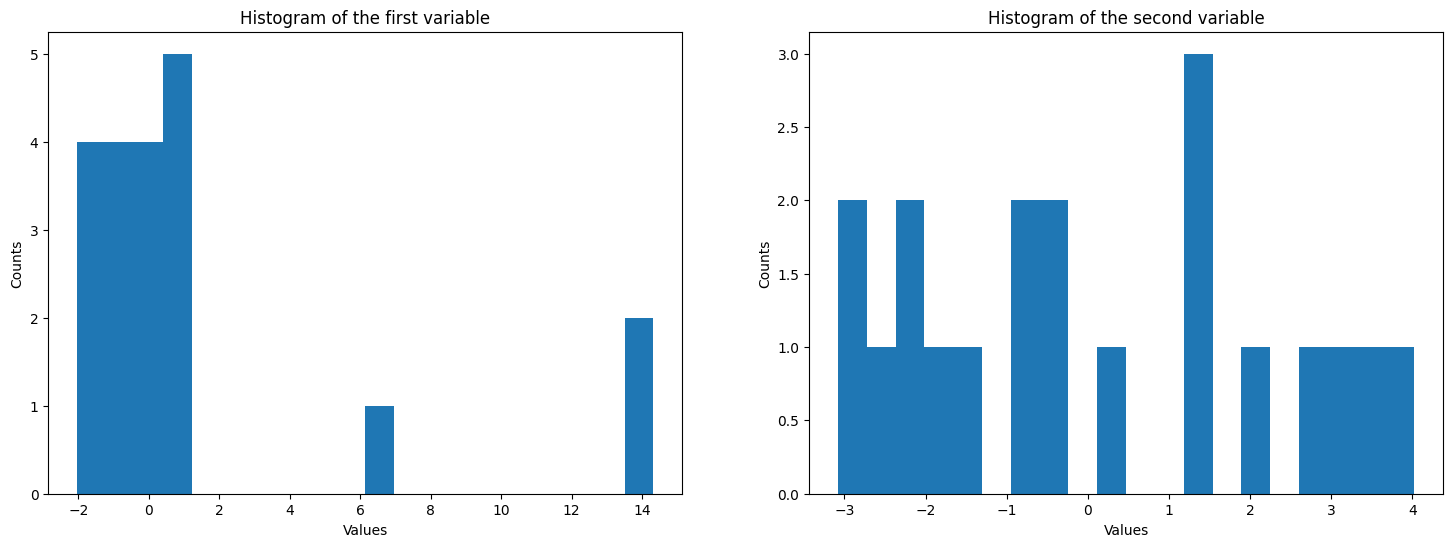

In [62]:
# Import necessary libraries
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from matplotlib import cm

# Assuming training_data and grid_elements are already defined as 2D arrays or DataFrames
# resulting from the data pre-processing process

# Convert training_data and grid_elements to PyTorch tensors with a float data type
training_data = torch.tensor(training_data, dtype=torch.float)
grid_elements = torch.tensor(grid_elements, dtype=torch.float)

# Define the training batch size
batch_size = 10

# Create a DataLoader object to handle batching of the training_data
# Shuffle the data before each epoch and drop the last incomplete batch
dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True, drop_last=True)

# Create a histogram of the first and second variables of the training_data
# using matplotlib

# Create a figure with two subplots (ax1 and ax2)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot a histogram of the first variable (column 0) of the training_data
# using 20 bins in the ax1 subplot
ax1.hist(training_data[:, 0], bins=20)
ax1.set_title("Histogram of the first variable")
ax1.set_xlabel("Values")
ax1.set_ylabel("Counts")

# Plot a histogram of the second variable (column 1) of the training_data
# using 20 bins in the ax2 subplot
ax2.hist(training_data[:, 1], bins=20)
ax2.set_title("Histogram of the second variable")
ax2.set_xlabel("Values")
ax2.set_ylabel("Counts")

# Display the figure
fig.show()


ibmqfactory.load_account:WARNING:2023-04-27 20:15:16,347: Credentials are already in use. The existing account in the session will be replaced.


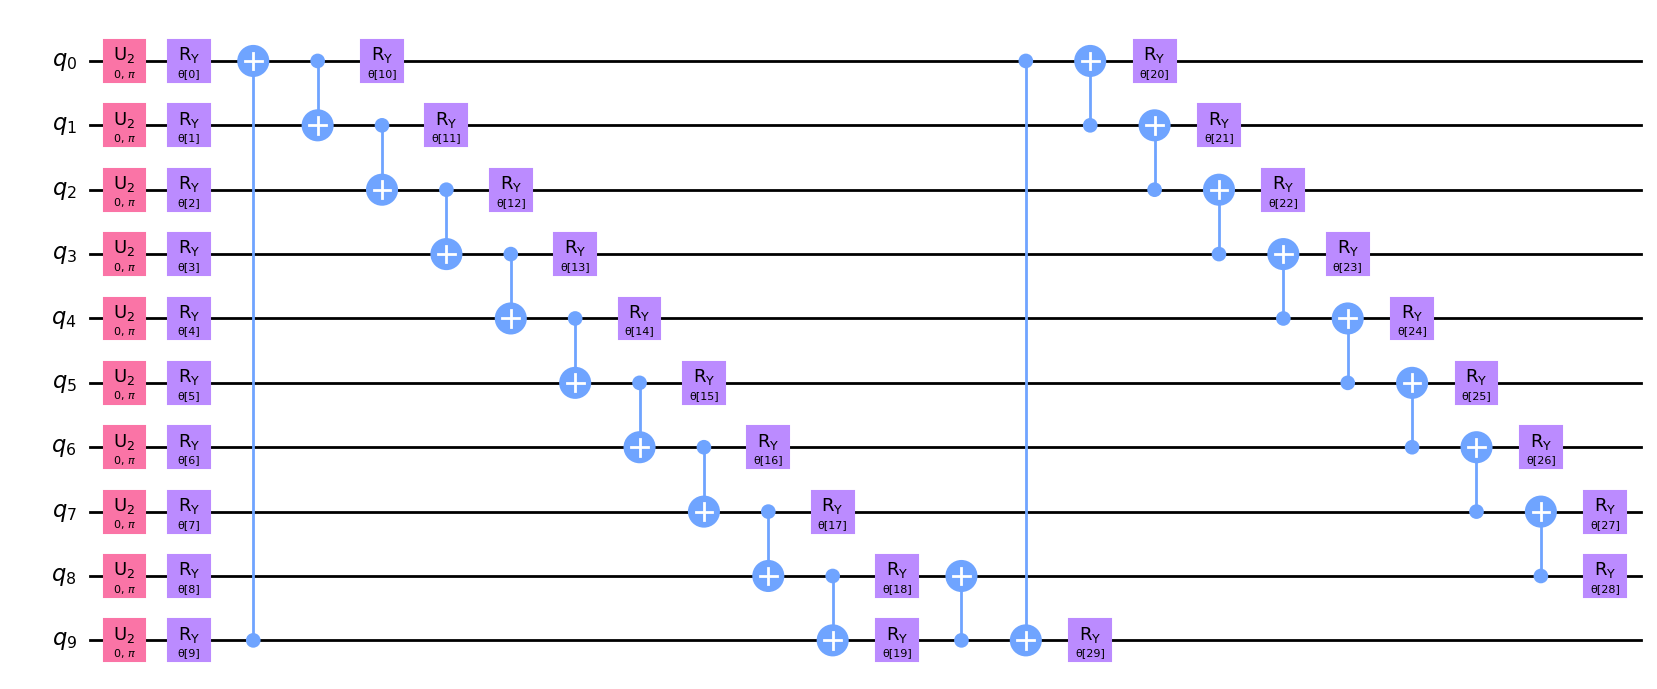

In [63]:
# Import necessary libraries
from qiskit import IBMQ
from qiskit.utils import QuantumInstance

# Save and load the IBMQ account with the provided API key
IBMQ.save_account('f788498a9bb1808e0d9c491721fa5ce8cdf66d26c3bb39ae71500ecc1a17cb0804c14e0d6d1c003fc50418cda3b7a11db31381bb75528bf27076a7cb17cf3a13', overwrite=True)
IBMQ.load_account()

# Get the provider and the backend for the quantum simulations
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('simulator_statevector')

# Create QuantumInstance objects for training and sampling, setting the number of shots
qi_training = QuantumInstance(backend, shots=batch_size)
qi_sampling = QuantumInstance(backend, shots=10000)

# Import necessary libraries for building the quantum circuit
from qiskit import Aer, QuantumCircuit
from qiskit.circuit.library import TwoLocal

# Assuming data_dim is already defined as a list of data resolutions for each dimension

# sum(data_dim) corresponds to the total number of qubits in our quantum circuit (qc)
qc = QuantumCircuit(sum(data_dim))

# Apply Hadamard (H) gates to all qubits in the quantum circuit
qc.h(qc.qubits)

# Choose a hardware-efficient ansatz
# Create a TwoLocal object with rotation gates (RY), CNOT (CX) gates, 2 repetitions,
# and sparse_cyclic (sca) entanglement
twolocal = TwoLocal(sum(data_dim), "ry", "cx", reps=2, entanglement="sca")

# Compose the quantum circuit (qc) with the TwoLocal object (twolocal)
qc.compose(twolocal, inplace=True)

# Draw the decomposed quantum circuit using the matplotlib (mpl) backend
qc.decompose().draw("mpl")


In [64]:
# Import necessary libraries
from qiskit_machine_learning.connectors import TorchConnector
from qiskit_machine_learning.neural_networks import CircuitQNN
from torch.optim import Adam
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from scipy.stats import entropy

# Function to create a generator using a TorchConnector and a CircuitQNN
def create_generator(quantum_instance) -> TorchConnector:
    circuit_qnn = CircuitQNN(
        qc,
        input_params=[],
        weight_params=qc.parameters,
        quantum_instance=quantum_instance,
        sampling=True,
        sparse=False,
        interpret=lambda x: grid_elements[x],
    )

    return TorchConnector(circuit_qnn)

# Define a Discriminator class as a subclass of nn.Module
class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()

        self.linear_input = nn.Linear(input_size, 20)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.linear20 = nn.Linear(20, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input: torch.Tensor) -> torch.Tensor:
        x = self.linear_input(input)
        x = self.leaky_relu(x)
        x = self.linear20(x)
        x = self.sigmoid(x)
        return x

# Define generator and discriminator loss functions
gen_loss_fun = nn.BCELoss()
disc_loss_fun = nn.BCELoss()

# Import necessary libraries for gradient calculation
from qiskit.opflow import Gradient, StateFn

# Define the generator gradient
generator_grad = Gradient().gradient_wrapper(
    StateFn(qc), twolocal.ordered_parameters, backend=qi_training
)

# Define the generator loss gradient function
def generator_loss_grad(parameter_values, discriminator):
    # Evaluate gradient
    grads = generator_grad(parameter_values).tolist()

    loss_grad = ()
    for j, grad in enumerate(grads):
        cx = grad[0].tocoo()
        input = torch.zeros(len(cx.col), len(data_dim))
        target = torch.ones(len(cx.col), 1)
        weight = torch.zeros(len(cx.col), 1)

        for i, (index, prob_grad) in enumerate(zip(cx.col, cx.data)):
            input[i, :] = grid_elements[index]
            weight[i, :] = prob_grad
        bce_loss_grad = F.binary_cross_entropy(discriminator(input), target, weight)
        loss_grad += (bce_loss_grad,)
    loss_grad = torch.stack(loss_grad)
    return loss_grad

# Define a function to calculate the relative entropy between generated data and true data
def get_relative_entropy(gen_data) -> float:
    prob_gen = np.zeros(len(grid_elements))
    for j, item in enumerate(grid_elements):
        for gen_item in gen_data.detach().numpy():
            if np.allclose(np.round(gen_item, 6), np.round(item, 6), rtol=1e-5):
                prob_gen[j] += 1
    prob_gen = prob_gen / len(gen_data)
    prob_gen = [1e-8 if x == 0 else x for x in prob_gen]
    return entropy(prob_gen, prob_data)

# Initialize generator and discriminator
generator = create_generator(qi_training)
discriminator = Discriminator(len(data_dim))

lr = 0.01  # learning rate
b1 = 0.9  # first momentum parameter
b2 = 0.999  # second momentum parameter
num_epochs = 100  # number of training epochs

# Optimizer for the generator
optimizer_gen = Adam(generator.parameters(), lr=lr, betas=(b1, b2))
# Optimizer for the discriminator
optimizer_disc = Adam(discriminator.parameters(), lr=lr, betas=(b1, b2))

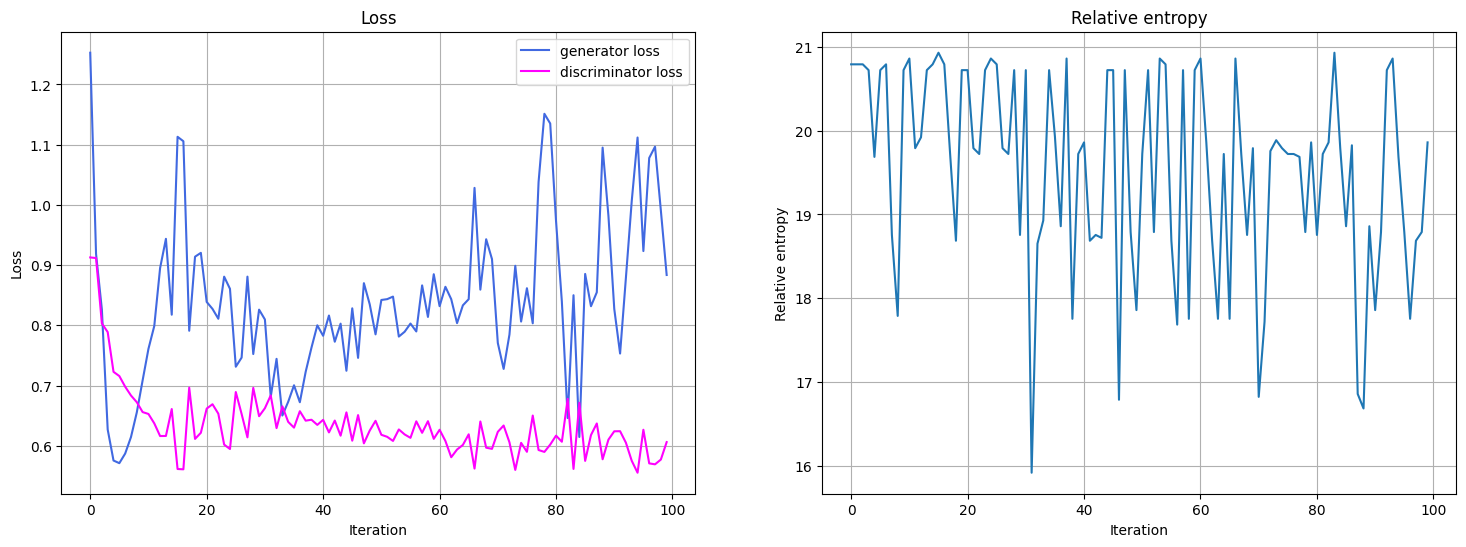

In [65]:
# Import necessary libraries
from IPython.display import clear_output
from scipy.stats import entropy
import matplotlib.pyplot as plt
import torch

# Function to plot training progress
def plot_training_progress():
    # We don't plot if we don't have enough data
    if len(generator_loss_values) < 2:
        return

    clear_output(wait=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

    # Loss
    ax1.set_title("Loss")
    ax1.plot(generator_loss_values, label="generator loss", color="royalblue")
    ax1.plot(discriminator_loss_values, label="discriminator loss", color="magenta")
    ax1.legend(loc="best")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Loss")
    ax1.grid()

    # Relative Entropy
    ax2.set_title("Relative entropy")
    ax2.plot(relative_entropy_values)
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Relative entropy")
    ax2.grid()
    plt_name = 'Loss_Relative_Entropy_%i.png'%type_number
    fig

# Initialize lists for storing relative entropy, generator loss, and discriminator loss values
relative_entropy_values = []
generator_loss_values = []
discriminator_loss_values = []

# Training loop
for epoch in range(num_epochs):
    relative_entropy_epoch = []
    generator_loss_epoch = []
    discriminator_loss_epoch = []
    for i, data in enumerate(dataloader):
        # Adversarial ground truths
        valid = torch.ones(data.size(0), 1)
        fake = torch.zeros(data.size(0), 1)

        # Generate a batch of data points
        gen_data = generator()

        # Evaluate Relative Entropy
        relative_entropy_epoch.append(get_relative_entropy(gen_data))

        # Train Discriminator
        optimizer_disc.zero_grad()

        # Loss measures discriminator's ability to distinguish real from generated samples
        disc_data = discriminator(data)
        real_loss = disc_loss_fun(disc_data, valid)
        fake_loss = disc_loss_fun(discriminator(gen_data), fake)
        discriminator_loss = (real_loss + fake_loss) / 2

        discriminator_loss.backward(retain_graph=True)
        optimizer_disc.step()

        # Train Generator
        optimizer_gen.zero_grad()

        # Loss measures generator's ability to prepare good data samples
        generator_loss = gen_loss_fun(discriminator(gen_data), valid)
        generator_loss.retain_grad = True
        g_loss_grad = generator_loss_grad(generator.weight.data.numpy(), discriminator)

        # generator_loss.backward(retain_graph=True)
        for j, param in enumerate(generator.parameters()):
            param.grad = g_loss_grad
        optimizer_gen.step()

        generator_loss_epoch.append(generator_loss.item())
        discriminator_loss_epoch.append(discriminator_loss.item())

    relative_entropy_values.append(np.mean(relative_entropy_epoch))
    generator_loss_values.append(np.mean(generator_loss_epoch))
    discriminator_loss_values.append(np.mean(discriminator_loss_epoch))

# Plot the training progress
plot_training_progress()


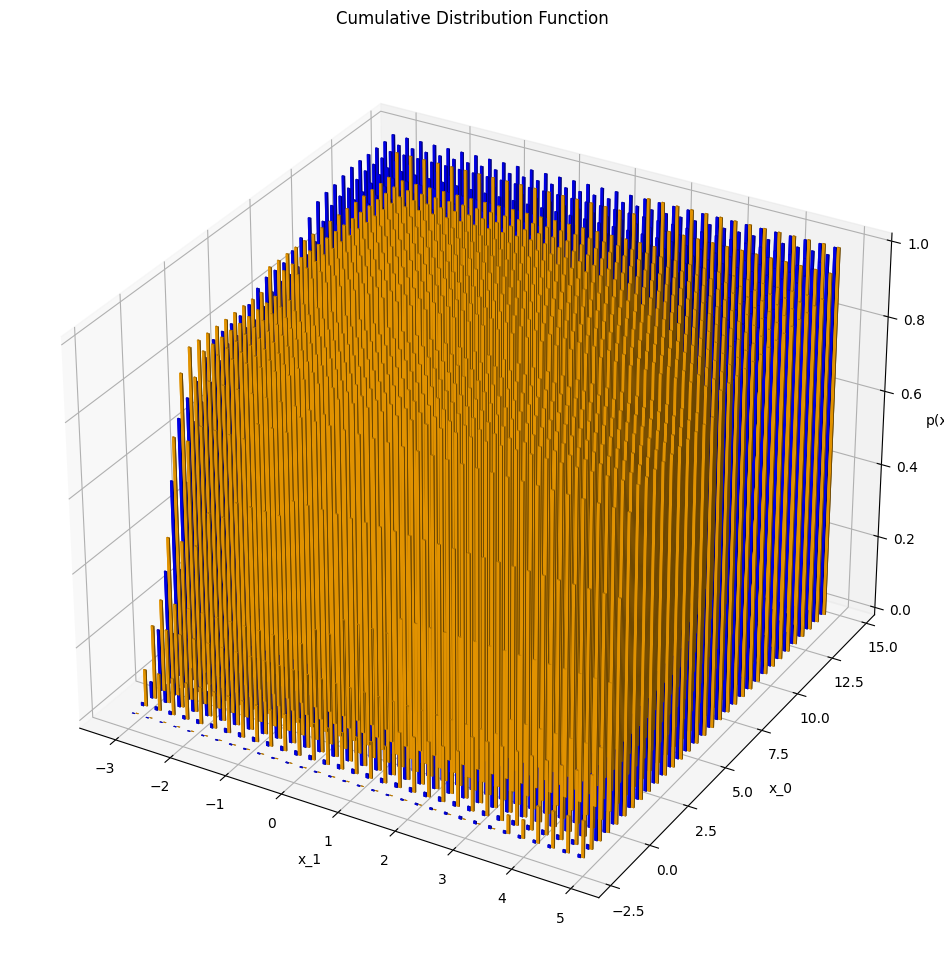

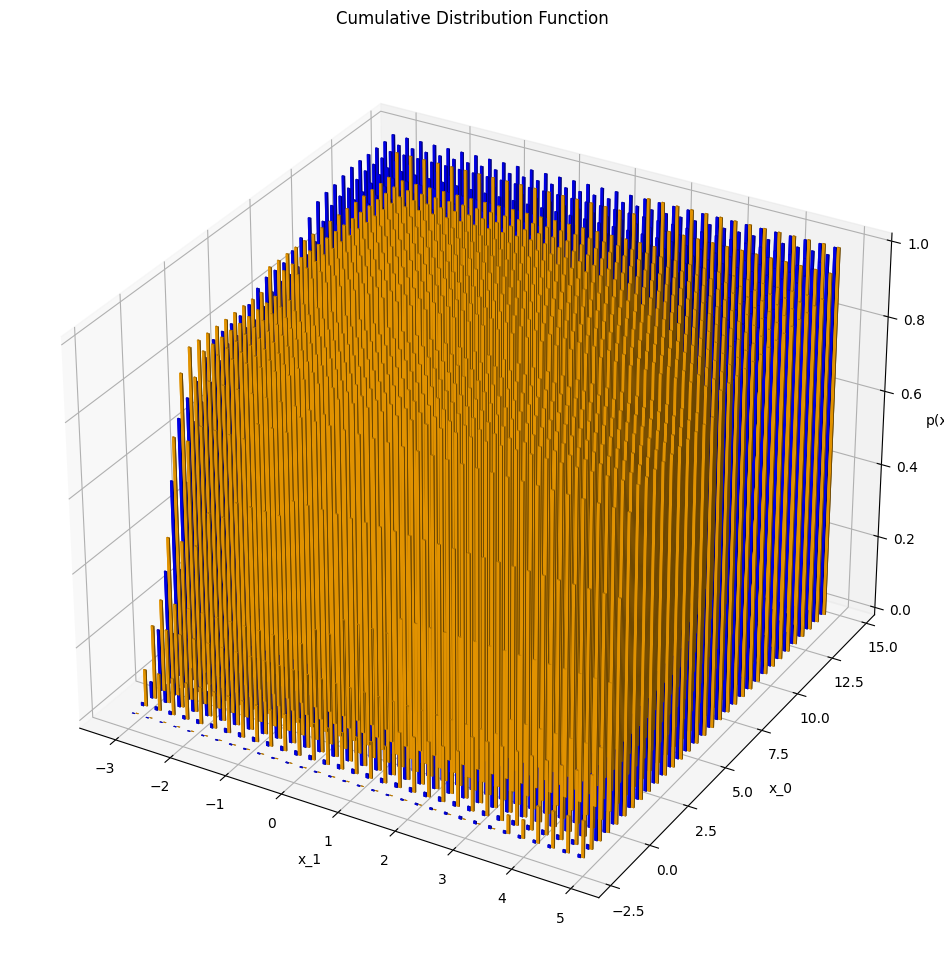

In [66]:
# Create a generator for sampling
generator_sampling = create_generator(qi_sampling)
generator_sampling.weight.data = generator.weight.data

# Generate data using the created generator
gen_data = generator_sampling().detach().numpy()
prob_gen = np.zeros(len(grid_elements))

# Calculate the probability distribution for generated data
for j, item in enumerate(grid_elements):
    for gen_item in gen_data:
        if np.allclose(np.round(gen_item, 6), np.round(item, 6), rtol=1e-5):
            prob_gen[j] += 1
prob_gen = prob_gen / len(gen_data)

# Replace zero probabilities with a very small value (1e-8)
prob_gen = [1e-8 if x == 0 else x for x in prob_gen]

# Plot the cumulative distribution function for generated and training data
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection="3d")
ax1.set_title("Cumulative Distribution Function")

ax1.bar3d(
    np.transpose(grid_elements)[1],
    np.transpose(grid_elements)[0],
    np.zeros(len(prob_gen)),
    0.05,
    0.05,
    np.cumsum(prob_gen),
    label="generated data",
    color="blue",
    alpha=1,
)

ax1.bar3d(
    np.transpose(grid_elements)[1] + 0.05,
    np.transpose(grid_elements)[0] + 0.05,
    np.zeros(len(prob_data)),
    0.05,
    0.05,
    np.cumsum(prob_data),
    label="training data",
    color="orange",
    alpha=1,
)

ax1.set_xlabel("x_1")
ax1.set_ylabel("x_0")
ax1.set_zlabel("p(x)")

plt_2_name ='Cumulative_Distribution_Function_%i.png'%type_number
#plt.savefig(plt_2_name)
fig


In [67]:
# Apply the inverse PCA transformation to the generated data
X_orig = np.dot(gen_data, extraction.components_)

# Inverse scale the data to its original range
X_orig_backscaled = scaler.inverse_transform(X_orig)
X_orig_backscaled

# Define the column names for the DataFrame
column_names = list(df.columns)

# Create a DataFrame with the back-scaled data and the column names
data = pd.DataFrame(X_orig_backscaled, columns=[
    'adaptation',
    'avg_isi',
    'electrode_0_pa',
    'f_i_curve_slope',
    'fast_trough_t_long_square',
    'fast_trough_t_ramp',
    'fast_trough_t_short_square',
    'fast_trough_v_long_square',
    'fast_trough_v_ramp',
    'fast_trough_v_short_square',
    'input_resistance_mohm',
    'latency',
    'peak_t_long_square',
    'peak_t_ramp',
    'peak_t_short_square',
    'peak_v_long_square',
    'peak_v_ramp',
    'peak_v_short_square',
    'ri',
    'sag',
    'seal_gohm',
    'slow_trough_t_long_square',
    'slow_trough_t_ramp',
    'slow_trough_t_short_square',
    'slow_trough_v_long_square',
    'slow_trough_v_ramp',
    'slow_trough_v_short_square',
    'tau',
    'threshold_i_long_square',
    'threshold_i_ramp',
    'threshold_i_short_square',
    'threshold_t_long_square',
    'threshold_t_ramp',
    'threshold_t_short_square',
    'threshold_v_long_square',
    'threshold_v_ramp',
    'threshold_v_short_square',
    'trough_t_long_square',
    'trough_t_ramp',
    'trough_t_short_square',
    'trough_v_long_square',
    'trough_v_ramp',
    'trough_v_short_square',
    'upstroke_downstroke_ratio_long_square',
    'upstroke_downstroke_ratio_ramp',
    'upstroke_downstroke_ratio_short_square',
    'vm_for_sag',
    'vrest'
])

# Add a 'Target' column to the DataFrame
data['Target'] = j

# Save the DataFrame to a CSV file
output_file = 'data_gan_%i.csv'%type_number
data.to_csv(output_file, index=False)